In [ ]:
# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## CNN model for all cut , clarity , shape ---- Low values for classification report

Found 10040 validated image filenames.
Found 2511 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 142s 447ms/step - accuracy: 0.0108 - loss: 0.2830 - val_accuracy: 0.0000e+00 - val_loss: 0.1953 - learning_rate: 0.0010
Epoch 2/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 135s 428ms/step - accuracy: 0.0039 - loss: 0.1990 - val_accuracy: 0.0000e+00 - val_loss: 0.1744 - learning_rate: 0.0010
Epoch 3/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 136s 434ms/step - accuracy: 0.0120 - loss: 0.1760 - val_accuracy: 0.0044 - val_loss: 0.1632 - learning_rate: 0.0010
Epoch 4/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 136s 432ms/step - accuracy: 0.0210 - loss: 0.1631 - val_accuracy: 0.0414 - val_loss: 0.1544 - learning_rate: 0.0010
Epoch 5/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 131s 418ms/step - accuracy: 0.0362 - loss: 0.1533 - val_accuracy: 0.0279 - val_loss: 0.1456 - learning_rate: 0.0010
Epoch 6/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 135s 430ms/step - accuracy: 0.0447 - loss: 0.1465 - val_accuracy: 0.0577 - val_loss: 0.1375 - learning_rate: 0.0010
Epoch 7/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 131s 416ms/step 

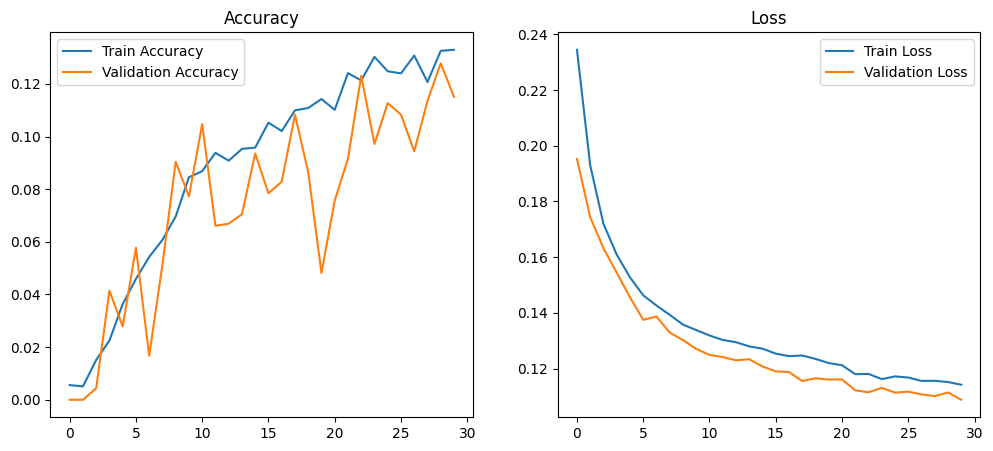

Found 2511 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 276ms/step
                                precision    recall  f1-score   support

       shape_Asscher - Octagon       0.91      0.45      0.60       118
                 shape_Cushion       0.93      0.75      0.83       487
             shape_Emerald Cut       0.82      0.76      0.79       260
                   shape_Fancy       0.87      0.41      0.56        49
                   shape_Heart       0.90      0.69      0.78        52
                shape_Marquise       1.00      0.14      0.25        21
                    shape_Oval       0.83      0.81      0.82       689
                    shape_Pear       0.88      0.78      0.83       210
                shape_Princess       0.80      0.22      0.35        18
                 shape_Radiant       0.86      0.40      0.55       125
                   shape_Round       0.87      0.68      0.76       421
                shape_Trillion       0.89      0.66      0.75        61
             clarity_

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import joblib  # For saving preprocessing files

# ==========================
# ✅ Define Paths
# ==========================
csv_path = "/content/final shape , cut , clarity drop color intensity.csv"  # Update with your CSV path
image_base_path = "/content/drive/MyDrive/Reupload_Images/"  # Folder containing images
encoded_csv_path = "/content/encoded_dataset.csv"  # Path to save the encoded dataset
model_save_path = "/content/gemstone cut , clarity , shape_model.h5"  # Path to save the trained model

# ==========================
# ✅ Load Dataset
# ==========================
df = pd.read_csv(csv_path)

# Convert image paths to absolute paths
df['Image id'] = df['Image id'].apply(lambda x: os.path.join(image_base_path, x))

# Define target columns by index (2nd to 4th columns)
target_columns = df.columns[1:4]  # Adjusting for zero-based indexing

# Apply one-hot encoding to target variables
encoder = OneHotEncoder(sparse_output=False)
encoded_labels = encoder.fit_transform(df[target_columns])

# Convert encoded labels into a DataFrame
encoded_labels_df = pd.DataFrame(encoded_labels, columns=encoder.get_feature_names_out(target_columns))

# Concatenate encoded labels with image paths
df_encoded = pd.concat([df[['Image id']], encoded_labels_df], axis=1)

# Save encoded dataset for future reference
df_encoded.to_csv(encoded_csv_path, index=False)

# Split dataset into training & validation sets
train_df, val_df = train_test_split(df_encoded, test_size=0.2, random_state=42)

# ==========================
# ✅ Data Augmentation
# ==========================
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Create generators
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image id",
    y_col=list(encoded_labels_df.columns),  # Use all one-hot encoded labels
    target_size=(128, 128),
    batch_size=32,
    class_mode="raw",  # Use "raw" for multi-label classification
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col=list(encoded_labels_df.columns),
    target_size=(128, 128),
    batch_size=32,
    class_mode="raw",
    shuffle=False
)

# ==========================
# ✅ Define CNN Model
# ==========================
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(encoded_labels.shape[1], activation='sigmoid')  # Multi-label classification
])

# ==========================
# ✅ Compile Model
# ==========================
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ==========================
# ✅ Define Callbacks (Early Stopping & Learning Rate Scheduler)
# ==========================
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# ==========================
# ✅ Train Model
# ==========================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)

# Save the trained model
model.save(model_save_path)

# ==========================
# ✅ Plot Accuracy & Loss
# ==========================
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

# ==========================
# ✅ Save Encoder for Future Use
# ==========================
encoder_path = "/content/encoder.pkl"
joblib.dump(encoder, encoder_path)

# ==========================
# ✅ Test Set Classification Report
# ==========================
test_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col=list(encoded_labels_df.columns),
    target_size=(128, 128),
    batch_size=32,
    class_mode="raw",
    shuffle=False
)

# Get true labels
true_labels = val_df[list(encoded_labels_df.columns)].values

# Predict on test set
pred_probs = model.predict(test_generator)
pred_labels = (pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=list(encoded_labels_df.columns))
print(report)


# CNN model for clarity

Found 10040 validated image filenames belonging to 4 classes.
Found 2511 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 7113s 23s/step - accuracy: 0.6491 - loss: 0.9150 - val_accuracy: 0.6639 - val_loss: 0.8647 - learning_rate: 0.0010
Epoch 2/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 145s 462ms/step - accuracy: 0.6579 - loss: 0.8752 - val_accuracy: 0.6639 - val_loss: 0.8387 - learning_rate: 0.0010
Epoch 3/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 146s 464ms/step - accuracy: 0.6599 - loss: 0.8641 - val_accuracy: 0.6639 - val_loss: 0.8382 - learning_rate: 0.0010
Epoch 4/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 145s 462ms/step - accuracy: 0.6644 - loss: 0.8549 - val_accuracy: 0.6639 - val_loss: 0.8428 - learning_rate: 0.0010
Epoch 5/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 141s 449ms/step - accuracy: 0.6711 - loss: 0.8402 - val_accuracy: 0.6639 - val_loss: 0.8386 - learning_rate: 0.0010
Epoch 6/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 143s 456ms/step - accuracy: 0.6625 - loss: 0.8490 - val_accuracy: 0.6639 - val_loss: 0.8281 - learning_rate: 0.0010
Epoch 7/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 140s 446ms/step - accurac

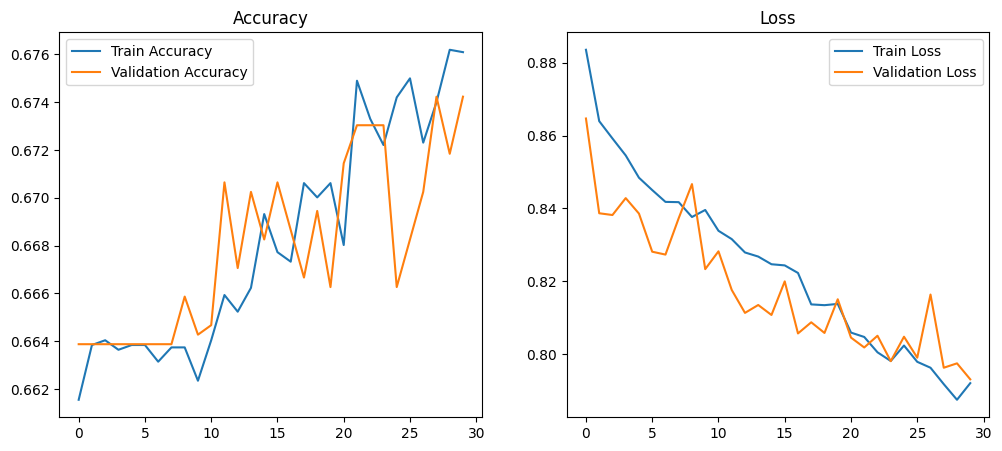

Found 2511 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 307ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                        precision    recall  f1-score   support

             Eye Clean       0.55      0.16      0.25       577
              Included       0.00      0.00      0.00         3
     Slightly Included       0.00      0.00      0.00       264
Very Slightly Included       0.68      0.96      0.80      1667

              accuracy                           0.67      2511
             macro avg       0.31      0.28      0.26      2511
          weighted avg       0.58      0.67      0.59      2511

Saved artifact at 'picture_clarity_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  131998166452176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131998166452944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131998166455824: TensorSpec(shape=(), dtype=tf.resource, 

In [ ]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ==========================
# ✅ Define Paths
# ==========================
csv_path = "/content/final trget variable is clarity drop cut , color intensity , shape.csv"  # Update with your CSV path
image_base_path = "/content/drive/MyDrive/Reupload_Images/"  # Folder containing images

# ==========================
# ✅ Load Dataset
# ==========================
df = pd.read_csv(csv_path)

# Convert image paths to absolute paths
df['Image id'] = df['Image id'].apply(lambda x: os.path.join(image_base_path, x))

# Ensure target variable is a string
df['clarity'] = df['clarity'].astype(str)  # Convert categorical labels to strings

# Split dataset into training & validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# ==========================
# ✅ Data Augmentation
# ==========================
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,  # Rotate images randomly by 20 degrees
    width_shift_range=0.2,  # Shift image horizontally
    height_shift_range=0.2,  # Shift image vertically
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom into images
    horizontal_flip=True,  # Flip images horizontally
    fill_mode="nearest"  # Fill missing pixels
)

# Create generators
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# ==========================
# ✅ Define CNN Model
# ==========================
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Prevents overfitting add dropot layers
    tf.keras.layers.Dense(len(df['clarity'].unique()), activation='softmax')
])

# ==========================
# ✅ Compile Model
# ==========================
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ==========================
# ✅ Define Callbacks (Early Stopping & Learning Rate Scheduler)
# ==========================
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop if val_loss doesn't improve for 5 epochs
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce learning rate by half
    patience=3,  # Wait 3 epochs before reducing
    min_lr=1e-6  # Minimum learning rate
)

# ==========================
# ✅ Train Model
# ==========================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)

# ==========================
# ✅ Plot Accuracy & Loss
# ==========================
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

# ==========================
# ✅ Test Set Classification Report
# ==========================
test_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Get true labels
true_labels = test_generator.classes

# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Predict on test set
pred_probs = model.predict(test_generator)  # Get softmax probabilities
pred_labels = np.argmax(pred_probs, axis=1)  # Convert probabilities to class labels

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels)
print(report)

# ✅ Save in the latest Keras format (recommended)
model.save("picture clarity.keras")

# ✅ Save in HDF5 format (optional, legacy format)
model.save("picture clarity.h5", save_format="h5")

# ✅ Save in TensorFlow SavedModel format (for TFLite/TF Serving)
model.export("picture_clarity_tf")

print("✅ Model saved successfully in .keras, .h5, and TensorFlow SavedModel format!")

# Use Enhance Data Augmentation for Minority Classes

Class counts before filtering: clarity
Very Slightly Included    8333
Eye Clean                 2884
Slightly Included         1312
Included                    22
Name: count, dtype: int64
Classes with only one sample: Index([], dtype='object', name='clarity')
Class counts after resampling: clarity
Very Slightly Included    8333
Slightly Included         8333
Eye Clean                 8333
Included                  8333
Name: count, dtype: int64
Found 26665 validated image filenames belonging to 4 classes.
Found 6667 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 392s 468ms/step - accuracy: 0.3670 - loss: 1.2928 - val_accuracy: 0.4842 - val_loss: 1.0791 - learning_rate: 0.0010
Epoch 2/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 369s 443ms/step - accuracy: 0.5019 - loss: 1.0505 - val_accuracy: 0.5728 - val_loss: 0.8608 - learning_rate: 0.0010
Epoch 3/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 322s 387ms/step - accuracy: 0.5610 - loss: 0.8961 - val_accuracy: 0.5895 - val_loss: 0.8187 - learning_rate: 0.0010
Epoch 4/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 398s 477ms/step - accuracy: 0.5789 - loss: 0.8356 - val_accuracy: 0.5995 - val_loss: 0.8006 - learning_rate: 0.0010
Epoch 5/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 397s 476ms/step - accuracy: 0.5935 - loss: 0.8101 - val_accuracy: 0.6072 - val_loss: 0.7724 - learning_rate: 0.0010
Epoch 6/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 402s 482ms/step - accuracy: 0.6030 - loss: 0.7904 - val_accuracy: 0.5935 - val_loss: 0.8016 - learning_rate: 0.0010
Epoch 7/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 411s 493ms/step - accura

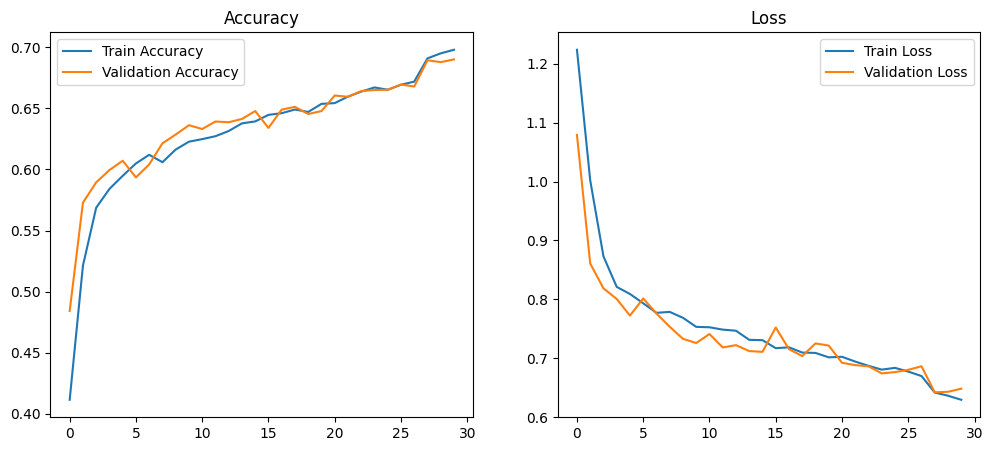

Found 6667 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


209/209 ━━━━━━━━━━━━━━━━━━━━ 71s 338ms/step
                        precision    recall  f1-score   support

             Eye Clean       0.64      0.67      0.65      1667
              Included       1.00      1.00      1.00      1666
     Slightly Included       0.62      0.72      0.67      1667
Very Slightly Included       0.46      0.36      0.40      1667

              accuracy                           0.69      6667
             macro avg       0.68      0.69      0.68      6667
          weighted avg       0.68      0.69      0.68      6667



Saved artifact at 'picture_balance_clarity_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  136997210871120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136997210871888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136997210874768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136997210873040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136997210874192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136997210875536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136997210871312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136997210875920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136997210876304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136997210877840: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Mode

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler  # For balancing data

# ==========================
# ✅ Define Paths
# ==========================
csv_path = "/content/final trget variable is clarity drop cut , color intensity , shape.csv"  # Update with your CSV path
image_base_path = "/content/drive/MyDrive/Reupload_Images/"  # Folder containing images

# ==========================
# ✅ Load Dataset
# ==========================
df = pd.read_csv(csv_path)

# Convert image paths to absolute paths
df['Image id'] = df['Image id'].apply(lambda x: os.path.join(image_base_path, x))

# Ensure target variable is a string
df['clarity'] = df['clarity'].astype(str)  # Convert categorical labels to strings (target is 'clarity' now)

# ==========================
# ✅ Check for classes with only one sample
# ==========================
class_counts = df['clarity'].value_counts()
print("Class counts before filtering:", class_counts)

# Identify classes with only one sample
classes_with_one_sample = class_counts[class_counts == 1].index
print("Classes with only one sample:", classes_with_one_sample)

# Remove rows with classes having only one sample
df_filtered = df[~df['clarity'].isin(classes_with_one_sample)]

# ==========================
# ✅ Oversample Minority Classes
# ==========================
X = df_filtered['Image id'].values.reshape(-1, 1)  # Convert to numpy array
y = df_filtered['clarity'].values  # Labels

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)  # Oversampling strategy
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create new DataFrame with resampled data
df_resampled = pd.DataFrame({'Image id': X_resampled.flatten(), 'clarity': y_resampled})

# Check new class distribution
print("Class counts after resampling:", df_resampled['clarity'].value_counts())

# ==========================
# ✅ Train-Validation Split
# ==========================
train_df, val_df = train_test_split(df_resampled, test_size=0.2, random_state=42, stratify=df_resampled['clarity'])

# ==========================
# ✅ Define Augmentation
# ==========================
# General augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# ✅ Define different augmentation settings for minority classes
minority_classes = class_counts[class_counts < 50].index.tolist()  # Adjust threshold as needed

minority_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

# Function to select appropriate data generator
def get_datagen(label):
    return minority_datagen if label in minority_classes else datagen

# ==========================
# ✅ Image Data Generators
# ==========================
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# ==========================
# ✅ Define CNN Model
# ==========================
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_df['clarity'].unique()), activation='softmax')  # Adjust output layer
])

# ==========================
# ✅ Compile Model
# ==========================
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ==========================
# ✅ Define Callbacks
# ==========================
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# ==========================
# ✅ Train Model
# ==========================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)

# ==========================
# ✅ Plot Accuracy & Loss
# ==========================
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

# ==========================
# ✅ Test Set Classification Report
# ==========================
test_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Get true labels
true_labels = test_generator.classes

# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Predict on test set
pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels)
print(report)

# ✅ Save in the latest Keras format (recommended)
model.save("picture balance clarity.keras")

# ✅ Save in HDF5 format (optional, legacy format)
model.save("picture balance clarity.h5", save_format="h5")

# ✅ Save in TensorFlow SavedModel format (for TFLite/TF Serving)
model.export("picture_balance_clarity_tf")

print("✅ Model saved successfully in .keras, .h5, and TensorFlow SavedModel format!")


# Reduce rotation range in data augmentation

Class counts before filtering: clarity
Very Slightly Included    8333
Eye Clean                 2884
Slightly Included         1312
Included                    22
Name: count, dtype: int64
Classes with only one sample: Index([], dtype='object', name='clarity')
Class counts after resampling: clarity
Very Slightly Included    8333
Slightly Included         8333
Eye Clean                 8333
Included                  8333
Name: count, dtype: int64
Found 26665 validated image filenames belonging to 4 classes.
Found 6667 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 382s 456ms/step - accuracy: 0.3646 - loss: 1.3084 - val_accuracy: 0.5044 - val_loss: 1.0313 - learning_rate: 0.0010
Epoch 2/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 381s 456ms/step - accuracy: 0.5302 - loss: 0.9716 - val_accuracy: 0.5856 - val_loss: 0.8227 - learning_rate: 0.0010
Epoch 3/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 381s 457ms/step - accuracy: 0.5770 - loss: 0.8441 - val_accuracy: 0.5875 - val_loss: 0.8258 - learning_rate: 0.0010
Epoch 4/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 382s 457ms/step - accuracy: 0.5943 - loss: 0.8115 - val_accuracy: 0.6037 - val_loss: 0.7815 - learning_rate: 0.0010
Epoch 5/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 378s 454ms/step - accuracy: 0.6014 - loss: 0.7830 - val_accuracy: 0.6216 - val_loss: 0.7549 - learning_rate: 0.0010
Epoch 6/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 382s 458ms/step - accuracy: 0.6190 - loss: 0.7642 - val_accuracy: 0.6285 - val_loss: 0.7323 - learning_rate: 0.0010
Epoch 7/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 382s 458ms/step - accura

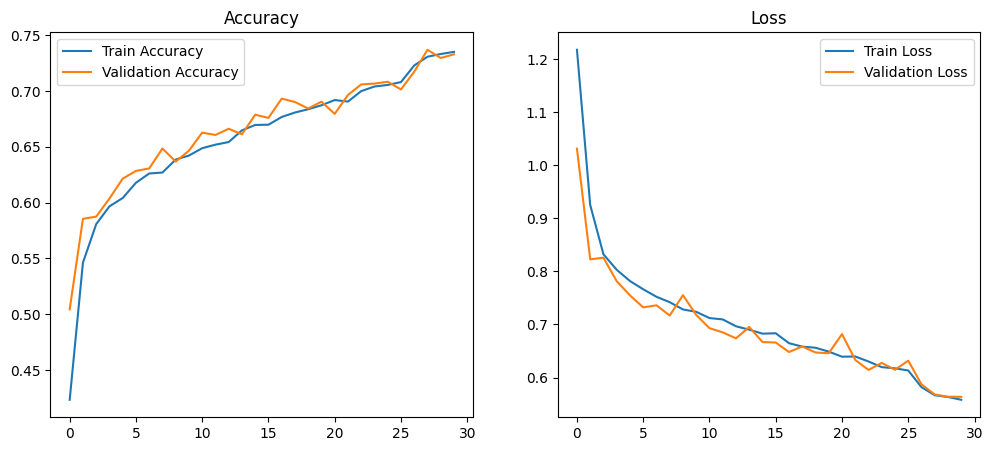

Found 6667 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


209/209 ━━━━━━━━━━━━━━━━━━━━ 64s 307ms/step


                        precision    recall  f1-score   support

             Eye Clean       0.67      0.74      0.71      1667
              Included       1.00      1.00      1.00      1666
     Slightly Included       0.73      0.77      0.75      1667
Very Slightly Included       0.52      0.44      0.48      1667

              accuracy                           0.74      6667
             macro avg       0.73      0.74      0.73      6667
          weighted avg       0.73      0.74      0.73      6667



In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler  # For balancing data

# ==========================
# ✅ Define Paths
# ==========================
csv_path = "/content/final trget variable is clarity drop cut , color intensity , shape.csv"  # Update with your CSV path
image_base_path = "/content/drive/MyDrive/Reupload_Images/"  # Folder containing images

# ==========================
# ✅ Load Dataset
# ==========================
df = pd.read_csv(csv_path)

# Convert image paths to absolute paths
df['Image id'] = df['Image id'].apply(lambda x: os.path.join(image_base_path, x))

# Ensure target variable is a string
df['clarity'] = df['clarity'].astype(str)  # Convert categorical labels to strings (target is 'clarity' now)

# ==========================
# ✅ Check for classes with only one sample
# ==========================
class_counts = df['clarity'].value_counts()
print("Class counts before filtering:", class_counts)

# Identify classes with only one sample
classes_with_one_sample = class_counts[class_counts == 1].index
print("Classes with only one sample:", classes_with_one_sample)

# Remove rows with classes having only one sample
df_filtered = df[~df['clarity'].isin(classes_with_one_sample)]

# ==========================
# ✅ Oversample Minority Classes
# ==========================
X = df_filtered['Image id'].values.reshape(-1, 1)  # Convert to numpy array
y = df_filtered['clarity'].values  # Labels

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)  # Oversampling strategy
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create new DataFrame with resampled data
df_resampled = pd.DataFrame({'Image id': X_resampled.flatten(), 'clarity': y_resampled})

# Check new class distribution
print("Class counts after resampling:", df_resampled['clarity'].value_counts())

# ==========================
# ✅ Train-Validation Split
# ==========================
train_df, val_df = train_test_split(df_resampled, test_size=0.2, random_state=42, stratify=df_resampled['clarity'])

# ==========================
# ✅ Define Augmentation
# ==========================
# General augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=10,   # Reduce rotation range
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

# ✅ Define different augmentation settings for minority classes
minority_classes = class_counts[class_counts < 50].index.tolist()  # Adjust threshold as needed

minority_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

# Function to select appropriate data generator
def get_datagen(label):
    return minority_datagen if label in minority_classes else datagen

# ==========================
# ✅ Image Data Generators
# ==========================
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# ==========================
# ✅ Define CNN Model
# ==========================
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_df['clarity'].unique()), activation='softmax')  # Adjust output layer
])

# ==========================
# ✅ Compile Model
# ==========================
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ==========================
# ✅ Define Callbacks
# ==========================
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# ==========================
# ✅ Train Model
# ==========================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)

# ==========================
# ✅ Plot Accuracy & Loss
# ==========================
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

# ==========================
# ✅ Test Set Classification Report
# ==========================
test_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Get true labels
true_labels = test_generator.classes

# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Predict on test set
pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels)
print(report)



# ✅ Save in HDF5 format (optional, legacy format)
model.save("picture fix data augmentation balance clarity.h5", save_format="h5")



209/209 ━━━━━━━━━━━━━━━━━━━━ 67s 319ms/step


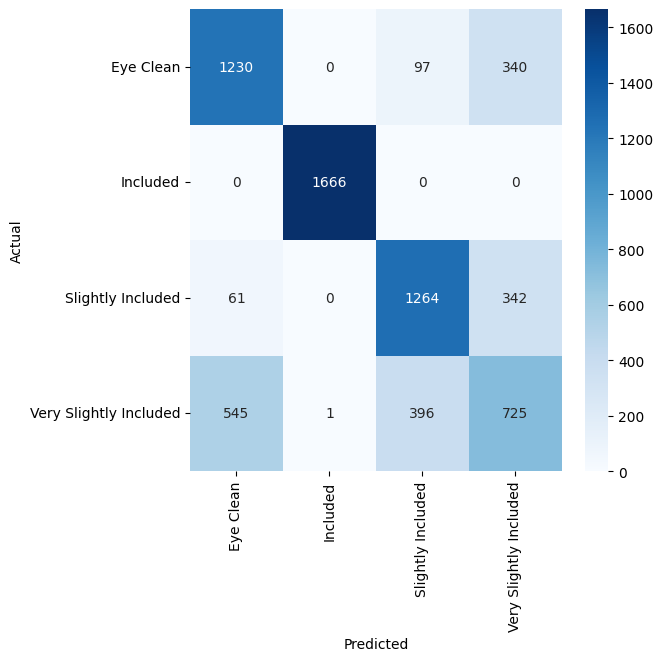

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Add Oversampling method to handle imbalance dataset

Class counts before filtering: clarity
Very Slightly Included    8333
Eye Clean                 2884
Slightly Included         1312
Included                    22
Name: count, dtype: int64
Classes with only one sample: Index([], dtype='object', name='clarity')
Class counts after resampling: clarity
Very Slightly Included    8333
Slightly Included         8333
Eye Clean                 8333
Included                  8333
Name: count, dtype: int64
Found 26665 validated image filenames belonging to 4 classes.
Found 6667 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 3600s 4s/step - accuracy: 0.3543 - loss: 1.3154 - val_accuracy: 0.4458 - val_loss: 1.1657 - learning_rate: 0.0010
Epoch 2/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 499s 598ms/step - accuracy: 0.4705 - loss: 1.0869 - val_accuracy: 0.5293 - val_loss: 0.9265 - learning_rate: 0.0010
Epoch 3/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 495s 594ms/step - accuracy: 0.5346 - loss: 0.9263 - val_accuracy: 0.5722 - val_loss: 0.8236 - learning_rate: 0.0010
Epoch 4/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 489s 587ms/step - accuracy: 0.5574 - loss: 0.8583 - val_accuracy: 0.5793 - val_loss: 0.8272 - learning_rate: 0.0010
Epoch 5/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 498s 597ms/step - accuracy: 0.5719 - loss: 0.8402 - val_accuracy: 0.5865 - val_loss: 0.8004 - learning_rate: 0.0010
Epoch 6/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 506s 606ms/step - accuracy: 0.5797 - loss: 0.8222 - val_accuracy: 0.5857 - val_loss: 0.8002 - learning_rate: 0.0010
Epoch 7/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 504s 604ms/step - accuracy

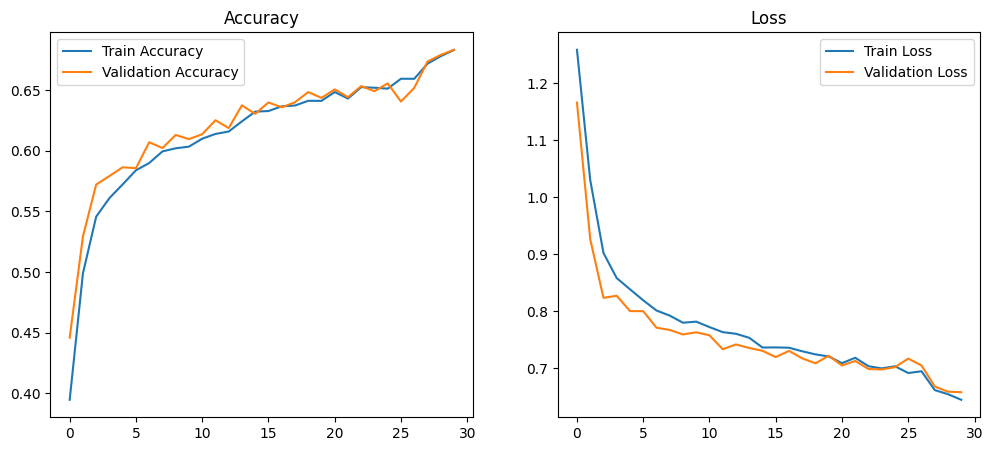

Found 6667 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


209/209 ━━━━━━━━━━━━━━━━━━━━ 78s 374ms/step


                        precision    recall  f1-score   support

             Eye Clean       0.60      0.78      0.68      1667
              Included       1.00      1.00      1.00      1666
     Slightly Included       0.63      0.70      0.66      1667
Very Slightly Included       0.46      0.27      0.34      1667

              accuracy                           0.69      6667
             macro avg       0.67      0.69      0.67      6667
          weighted avg       0.67      0.69      0.67      6667



In [ ]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

# ==========================
# ✅ Define Paths
# ==========================
csv_path = "/content/final trget variable clarity drop shape , cut, color intensity and other features.csv"  # Update with your CSV path
image_base_path = "/content/drive/MyDrive/Reupload_Images/"  # Folder containing images

# ==========================
# ✅ Load Dataset
# ==========================
df = pd.read_csv(csv_path)

# Convert image paths to absolute paths
df['Image id'] = df['Image id'].apply(lambda x: os.path.join(image_base_path, x))

# Ensure target variable is a string
df['clarity'] = df['clarity'].astype(str)

# ==========================
# ✅ Check for classes with only one sample
# ==========================
class_counts = df['clarity'].value_counts()
print("Class counts before filtering:", class_counts)

# Identify classes with only one sample
classes_with_one_sample = class_counts[class_counts == 1].index
print("Classes with only one sample:", classes_with_one_sample)

# Remove rows with classes having only one sample
df_filtered = df[~df['clarity'].isin(classes_with_one_sample)]

# ==========================
# ✅ Oversample Minority Classes
# ==========================
X = df_filtered['Image id'].values.reshape(-1, 1)
y = df_filtered['clarity'].values

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.DataFrame({'Image id': X_resampled.flatten(), 'clarity': y_resampled})

print("Class counts after resampling:", df_resampled['clarity'].value_counts())

# ==========================
# ✅ Train-Validation Split
# ==========================
train_df, val_df = train_test_split(df_resampled, test_size=0.2, random_state=42, stratify=df_resampled['clarity'])

# ==========================
# ✅ Define Augmentation
# ==========================
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# ✅ Define different augmentation settings for minority classes
minority_classes = class_counts[class_counts < 50].index.tolist()

minority_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

def get_datagen(label):
    return minority_datagen if label in minority_classes else datagen

# ==========================
# ✅ Image Data Generators
# ==========================
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# ==========================
# ✅ Define CNN Model
# ==========================
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(df['clarity'].unique()), activation='softmax')
])

# ==========================
# ✅ Compile Model
# ==========================
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ==========================
# ✅ Define Callbacks
# ==========================
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# ==========================
# ✅ Train Model
# ==========================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)

# ==========================
# ✅ Plot Accuracy & Loss
# ==========================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

# ==========================
# ✅ Test Set Classification Report
# ==========================
test_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)

report = classification_report(true_labels, pred_labels, target_names=class_labels)
print(report)

# ✅ Save the entire model (architecture + weights)
model.save('clarity_classification_model.h5')


# Best Clarity Model

# **# Adjust Data Augmentation:**

## Reduced zoom_range and removed extreme transformations (rotation_range, shear_range, width_shift_range).

## Added brightness_range instead to enhance subtle clarity features

# **## Output Layer Fixed:**

### The final layer now has exactly 4 neurons (Dense(4, activation='softmax')) to match the 4 clarity classes.





Class counts before filtering: clarity
Very Slightly Included    8333
Eye Clean                 2884
Slightly Included         1312
Included                    22
Name: count, dtype: int64
Classes with only one sample: Index([], dtype='object', name='clarity')
Class counts after resampling: clarity
Very Slightly Included    8333
Slightly Included         8333
Eye Clean                 8333
Included                  8333
Name: count, dtype: int64
Found 26665 validated image filenames belonging to 4 classes.
Found 6667 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 506s 604ms/step - accuracy: 0.4399 - loss: 1.1613 - val_accuracy: 0.5952 - val_loss: 0.7999 - learning_rate: 0.0010
Epoch 2/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 500s 600ms/step - accuracy: 0.5913 - loss: 0.8084 - val_accuracy: 0.6264 - val_loss: 0.7521 - learning_rate: 0.0010
Epoch 3/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 498s 597ms/step - accuracy: 0.6218 - loss: 0.7544 - val_accuracy: 0.6600 - val_loss: 0.6981 - learning_rate: 0.0010
Epoch 4/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 502s 601ms/step - accuracy: 0.6410 - loss: 0.7191 - val_accuracy: 0.6750 - val_loss: 0.6958 - learning_rate: 0.0010
Epoch 5/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 485s 582ms/step - accuracy: 0.6627 - loss: 0.6905 - val_accuracy: 0.7014 - val_loss: 0.6407 - learning_rate: 0.0010
Epoch 6/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 481s 577ms/step - accuracy: 0.6888 - loss: 0.6514 - val_accuracy: 0.7111 - val_loss: 0.6067 - learning_rate: 0.0010
Epoch 7/30
834/834 ━━━━━━━━━━━━━━━━━━━━ 482s 578ms/step - accura

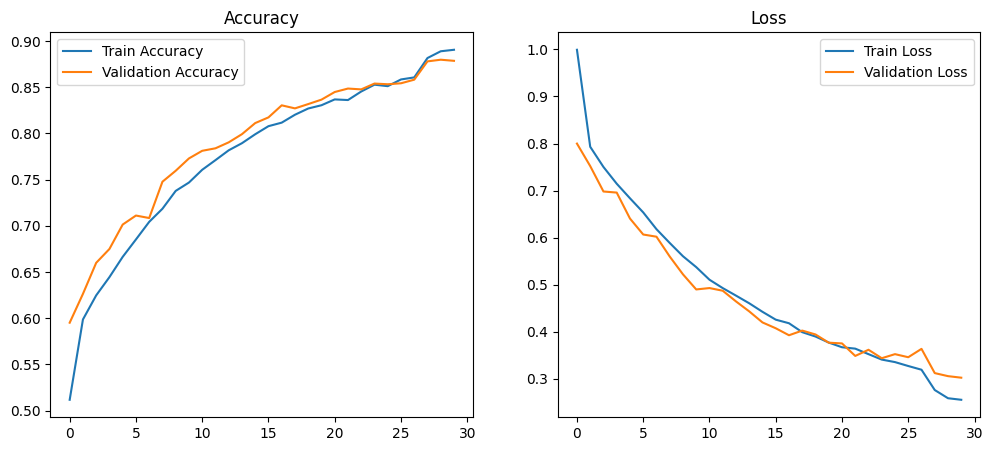

Found 6667 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


209/209 ━━━━━━━━━━━━━━━━━━━━ 80s 384ms/step


                        precision    recall  f1-score   support

             Eye Clean       0.83      0.80      0.82      1667
              Included       1.00      1.00      1.00      1666
     Slightly Included       0.89      0.97      0.93      1667
Very Slightly Included       0.77      0.73      0.75      1667

              accuracy                           0.88      6667
             macro avg       0.87      0.88      0.88      6667
          weighted avg       0.87      0.88      0.88      6667



In [ ]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

# ==========================
# ✅ Define Paths
# ==========================
csv_path = "/content/final trget variable clarity drop shape , cut, color intensity and other features.csv"  # Update with your CSV path
image_base_path = "/content/drive/MyDrive/Reupload_Images/"  # Folder containing images

# ==========================
# ✅ Load Dataset
# ==========================
df = pd.read_csv(csv_path)

# Convert image paths to absolute paths
df['Image id'] = df['Image id'].apply(lambda x: os.path.join(image_base_path, x))

# Ensure target variable is a string
df['clarity'] = df['clarity'].astype(str)

# ==========================
# ✅ Check for classes with only one sample
# ==========================
class_counts = df['clarity'].value_counts()
print("Class counts before filtering:", class_counts)

# Identify classes with only one sample
classes_with_one_sample = class_counts[class_counts == 1].index
print("Classes with only one sample:", classes_with_one_sample)

# Remove rows with classes having only one sample
df_filtered = df[~df['clarity'].isin(classes_with_one_sample)]

# ==========================
# ✅ Oversample Minority Classes
# ==========================
X = df_filtered['Image id'].values.reshape(-1, 1)
y = df_filtered['clarity'].values

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.DataFrame({'Image id': X_resampled.flatten(), 'clarity': y_resampled})

print("Class counts after resampling:", df_resampled['clarity'].value_counts())

# ==========================
# ✅ Train-Validation Split
# ==========================
train_df, val_df = train_test_split(df_resampled, test_size=0.2, random_state=42, stratify=df_resampled['clarity'])

# ==========================
# ✅ Define Augmentation (Adjusted for Clarity)
# ==========================
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    brightness_range=[0.8, 1.2],  # ✅ Adjusted augmentation (less geometric transformations)
    zoom_range=0.1,  # ✅ Reduced zoom to avoid distortion
    horizontal_flip=True,
    fill_mode="nearest"
)

# ==========================
# ✅ Image Data Generators
# ==========================
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# ==========================
# ✅ Define CNN Model
# ==========================
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(4, activation='softmax')  # ✅ Adjusted output layer for clarity (exactly 4 classes)
])

# ==========================
# ✅ Compile Model
# ==========================
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ==========================
# ✅ Define Callbacks
# ==========================
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# ==========================
# ✅ Train Model
# ==========================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)

# ==========================
# ✅ Plot Accuracy & Loss
# ==========================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

# ==========================
# ✅ Test Set Classification Report
# ==========================
test_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="clarity",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)

report = classification_report(true_labels, pred_labels, target_names=class_labels)
print(report)

# ✅ Save the entire model (architecture + weights)
model.save('clarity_classification_model01.h5')


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os

# ==========================
# ✅ Load the Saved Model
# ==========================
model_path = "/content/clarity_classification_model01.h5"  # Update the path if needed
model = tf.keras.models.load_model(model_path)

# ==========================
# ✅ Define Image Preprocessing Function
# ==========================
def preprocess_image(image_path):
    """Loads and preprocesses an image for model prediction."""
    img = cv2.imread(image_path)  # Load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (128, 128))  # Resize to match training input size
    img = img / 255.0  # Rescale pixel values (same as training)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# ==========================
# ✅ Define Input Image Path
# ==========================
image_path = "/content/Blue Sapphire 11.jpg"  # Replace with your image path

# ==========================
# ✅ Preprocess Input Image
# ==========================
preprocessed_img = preprocess_image(image_path)

# ==========================
# ✅ Make Prediction
# ==========================
pred_probs = model.predict(preprocessed_img)
pred_label_index = np.argmax(pred_probs)  # Get class index

# ==========================
# ✅ Get Class Labels (Ensure Correct Order)
# ==========================
class_labels = ["Eye Clean", "Included", "Slightly Included", "Very Slightly Included"]


predicted_class = class_labels[pred_label_index]
confidence = pred_probs[0][pred_label_index] * 100  # Confidence percentage

# ==========================
# ✅ Display Prediction Result
# ==========================
print(f"Predicted Clarity: {predicted_class} (Confidence: {confidence:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicted Clarity: Eye Clean (Confidence: 50.66%)
